In [2]:
from google.colab import files; files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"xolila","key":"d2ecd17b261c8613b4bd7f83dcffe93f"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!pip install kaggle

In [5]:
!kaggle datasets download -d camnugent/california-housing-prices -p /content/california-housing-prices --unzip

Dataset URL: https://www.kaggle.com/datasets/camnugent/california-housing-prices
License(s): CC0-1.0
  0% 0.00/400k [00:00<?, ?B/s]
100% 400k/400k [00:00<00:00, 628MB/s]


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv("/content/california-housing-prices/housing.csv",encoding="latin1")

In [8]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [9]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
data.dropna(inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [13]:
from sklearn.model_selection import train_test_split
x = data.drop("median_house_value", axis=1)
y = data["median_house_value"]

In [14]:
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

In [15]:
train_data = X_test.join(y_test)

In [16]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8940,-118.47,34.01,41.0,752.0,201.0,482.0,207.0,2.5417,<1H OCEAN,418200.0
12727,-121.36,38.60,35.0,1930.0,328.0,805.0,338.0,4.4643,INLAND,133000.0
12283,-116.77,33.92,19.0,2307.0,525.0,1266.0,437.0,1.6875,INLAND,63000.0
2840,-118.97,35.40,34.0,1859.0,323.0,854.0,309.0,3.1906,INLAND,76200.0
19044,-121.81,38.45,24.0,1951.0,341.0,1140.0,338.0,3.7061,INLAND,128500.0
...,...,...,...,...,...,...,...,...,...,...
12711,-121.40,38.59,25.0,2228.0,534.0,1130.0,481.0,2.5363,INLAND,124600.0
14677,-117.11,32.84,16.0,4608.0,629.0,2020.0,636.0,6.0400,<1H OCEAN,243000.0
4717,-118.38,34.06,29.0,3946.0,1008.0,1676.0,876.0,2.7824,<1H OCEAN,450000.0
9833,-121.92,36.63,40.0,1076.0,193.0,406.0,180.0,3.4943,<1H OCEAN,311100.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

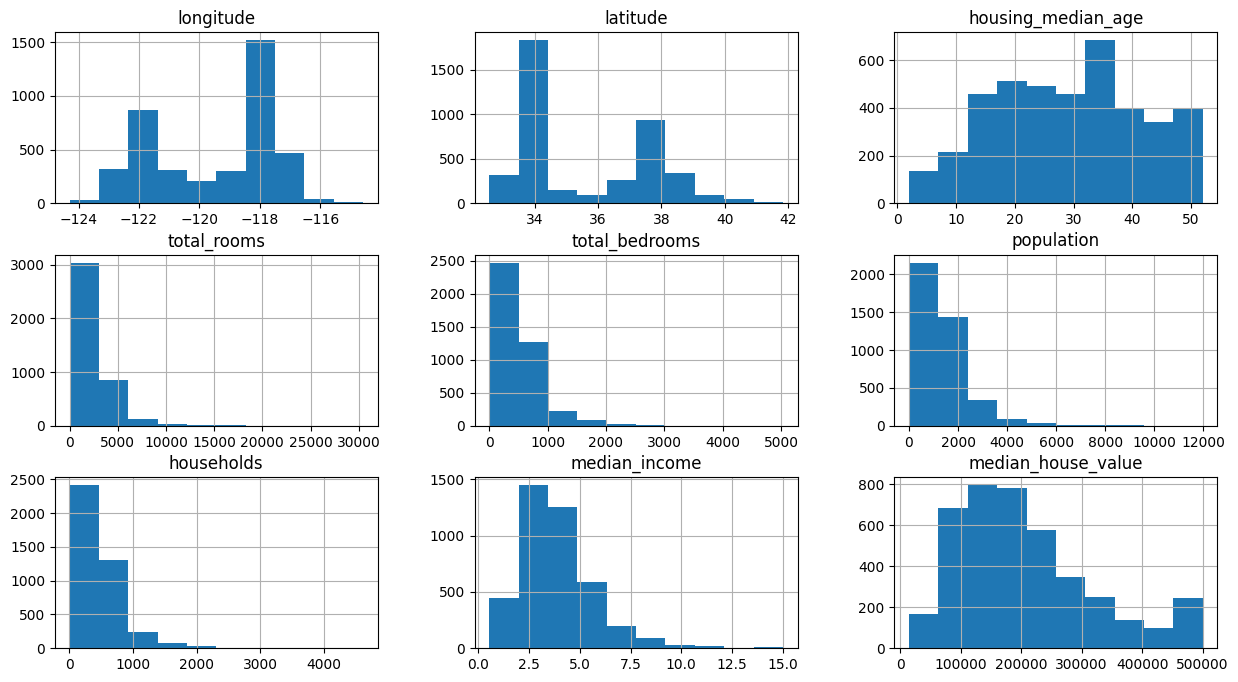

In [17]:
train_data.hist(figsize=(15 , 8))

<Axes: >

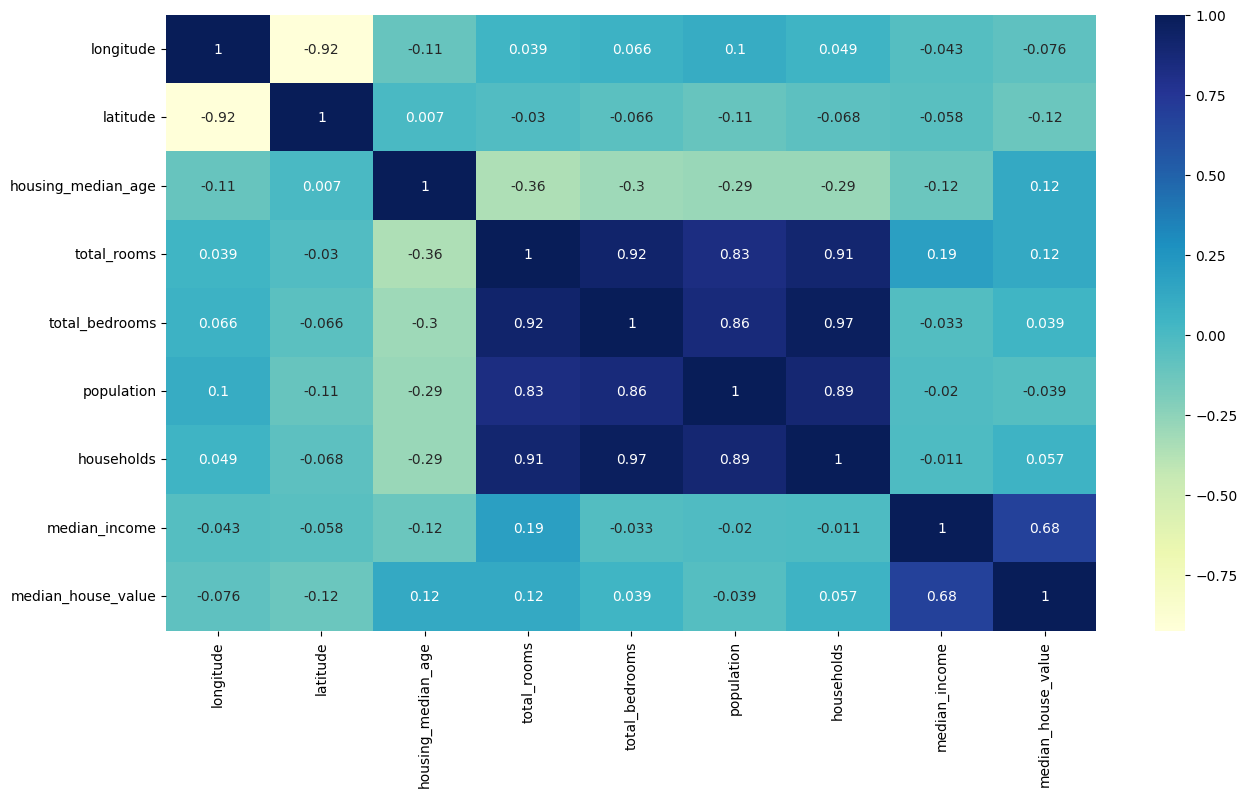

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True) , annot=True, cmap="YlGnBu")

In [20]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

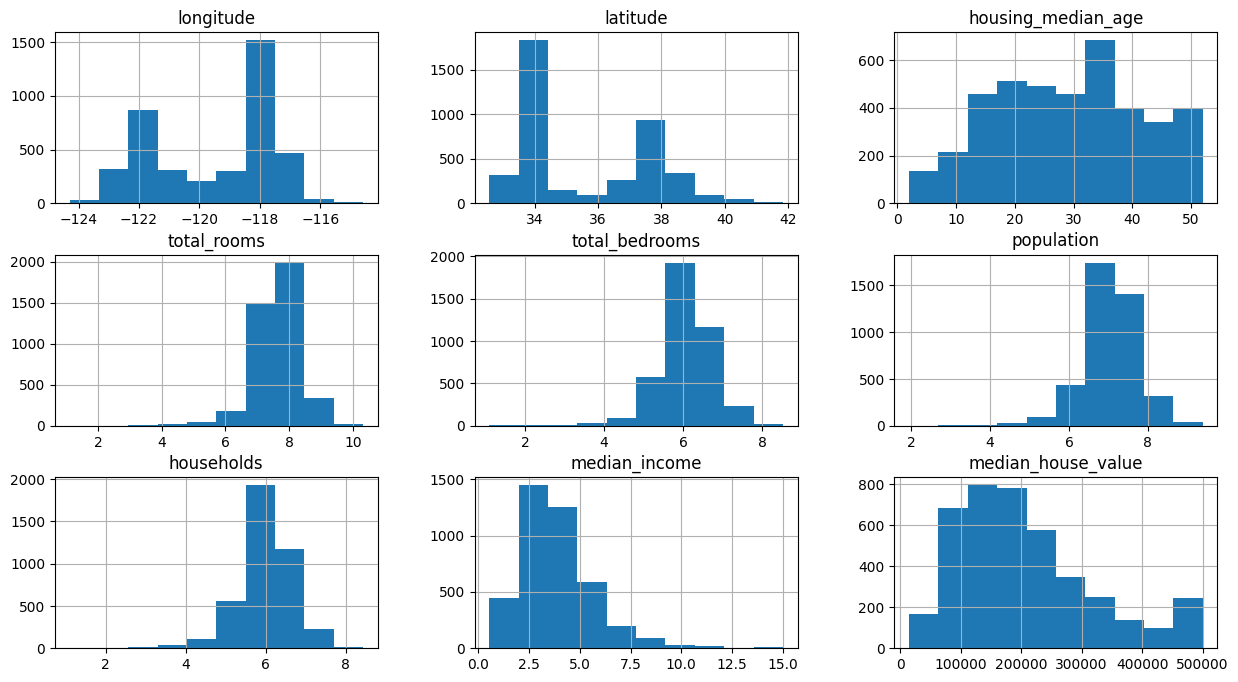

In [21]:
train_data.hist(figsize=(15 , 8))

In [22]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(["ocean_proximity"] , axis=1)

<Axes: >

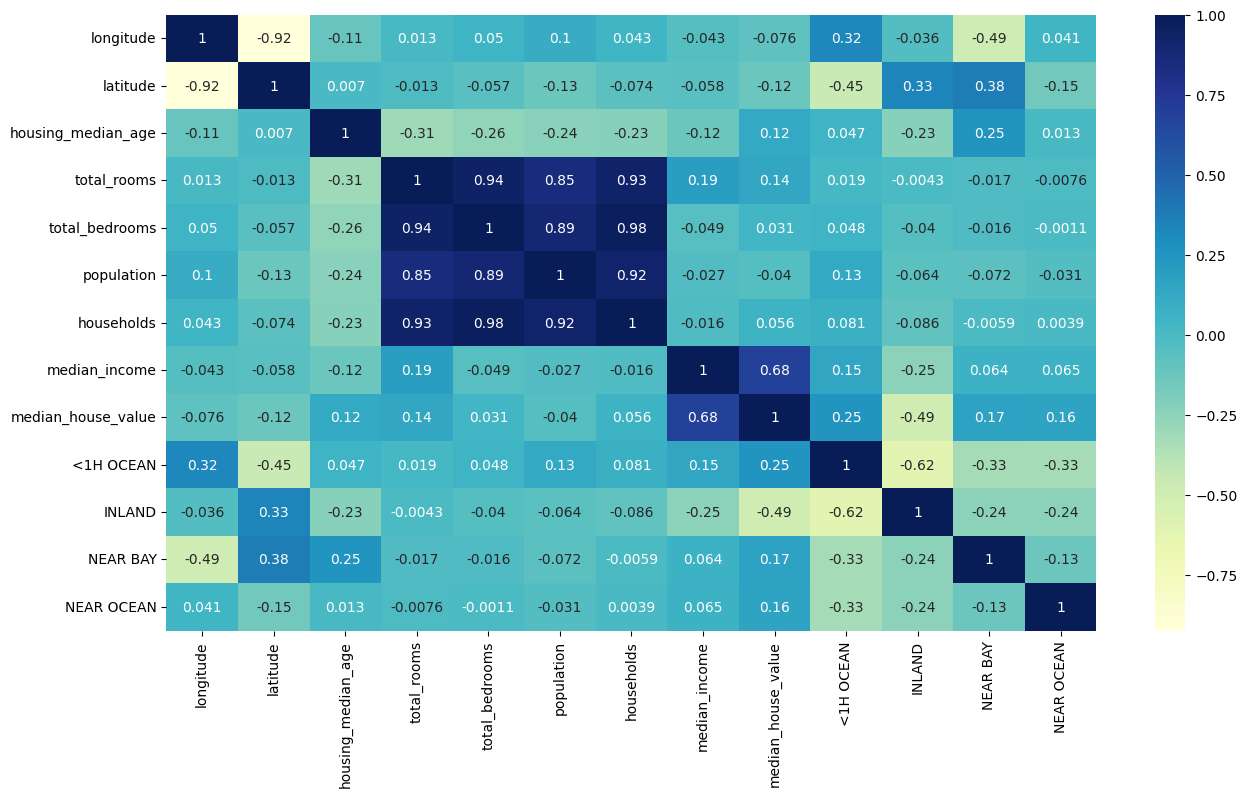

In [23]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True) , annot=True, cmap="YlGnBu")

<Axes: xlabel='longitude', ylabel='latitude'>

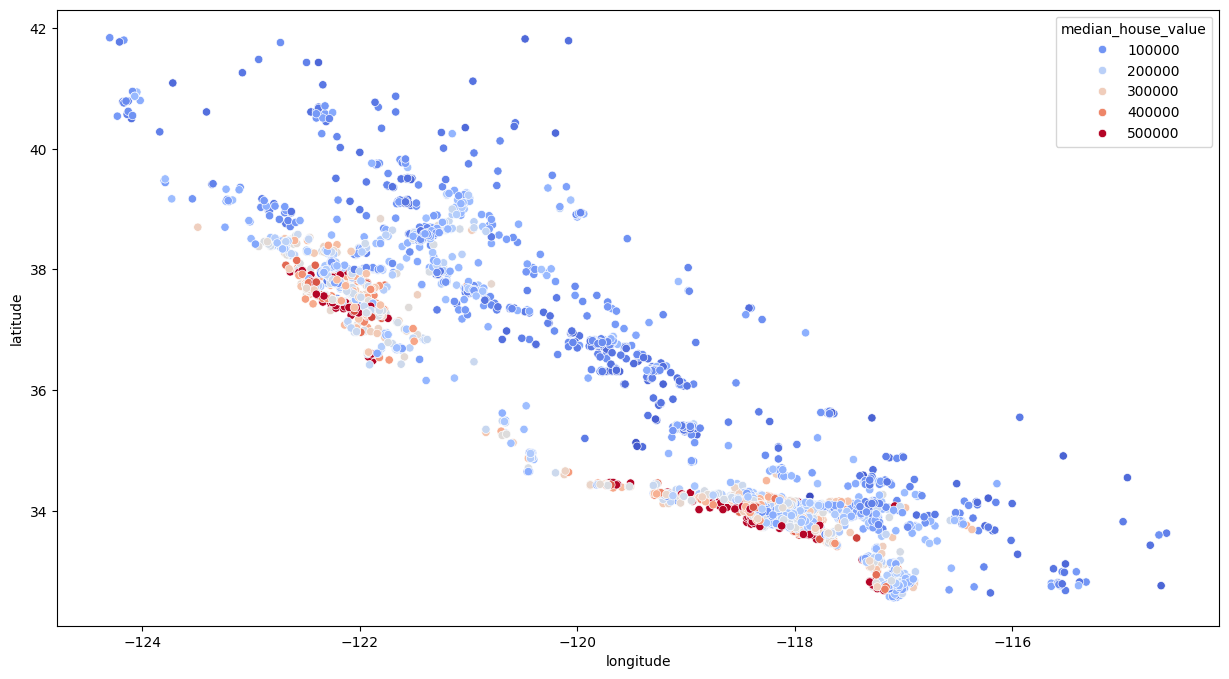

In [24]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="longitude" , y="latitude" , data=train_data , hue="median_house_value" , palette="coolwarm")

In [25]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

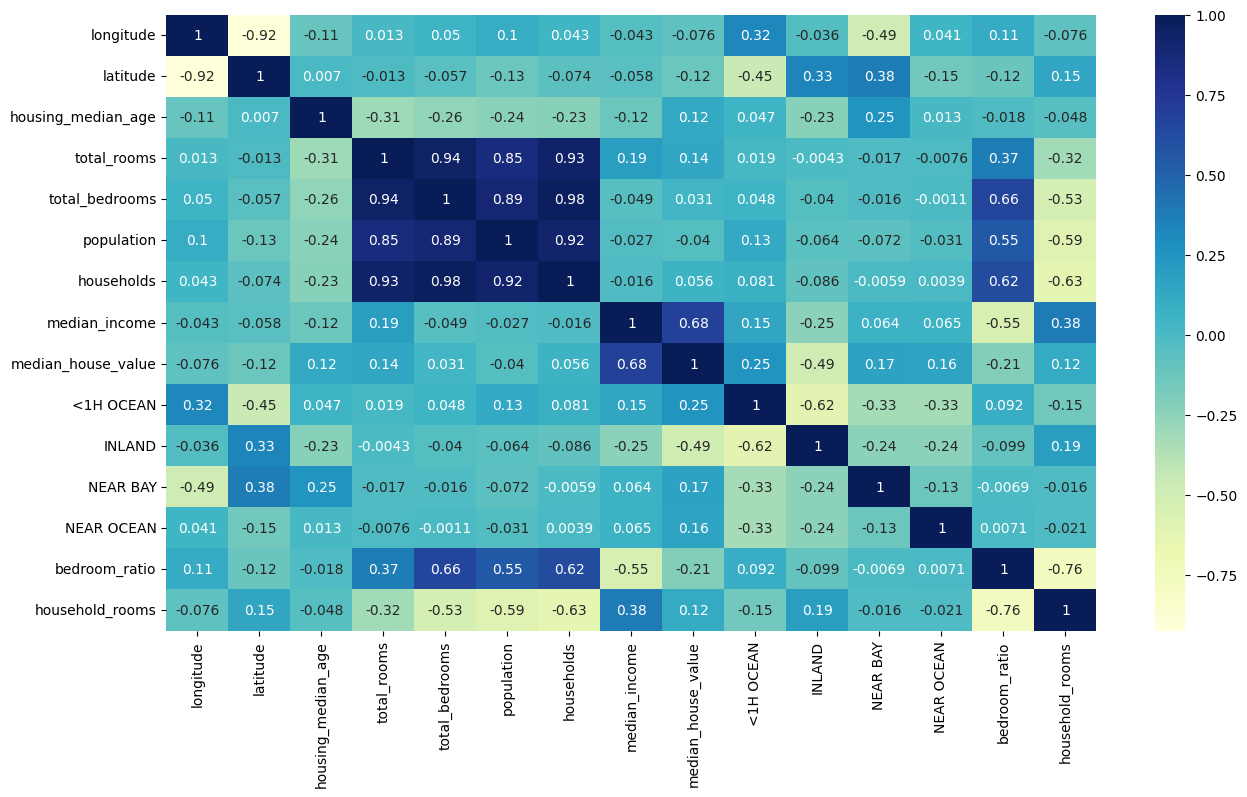

In [26]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True) , annot=True, cmap="YlGnBu")

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train, y_train =train_data.drop(['median_house_value'] , axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)
reg= LinearRegression()
reg.fit(X_train , y_train)

LinearRegression()

In [28]:
from sklearn.model_selection import train_test_split

_, X_test, _, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # Using a placeholder for X_train_temp, y_train_temp

test_data = X_test.join(y_test)
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'] , axis=1) # Removed drop_first=True
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']
X_test, y_test =test_data.drop(['median_house_value'] , axis=1), test_data['median_house_value']

In [29]:
X_test, y_test =test_data.drop(['median_house_value'] , axis=1), test_data['median_house_value']

In [34]:

train_cols = X_train.columns
X_test_aligned = X_test.reindex(columns=train_cols, fill_value=0)
X_test_s = scaler.transform(X_test_aligned)

In [36]:
reg.score(X_test_aligned , y_test)

0.6674178773596409

In [37]:
from sklearn.ensemble import RandomForestRegressor
forest= RandomForestRegressor()
forest.fit(X_train , y_train)

RandomForestRegressor()

In [39]:
forest.score(X_test_aligned , y_test)

0.8005754959840915

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid={
    "n_estimators" : [30,50,100],
    "max_features" : [8,12,16],

}
grid_serach = GridSearchCV(forest , param_grid , cv=5,
                           scoring = "neg_mean_squared_error" ,
                           return_train_score =True)
grid_serach.fit(X_train_s , y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 12, 16],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

best_forest = grid_serach.best_estimator_

final_predictions = best_forest.predict(X_test_s)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_mae = mean_absolute_error(y_test, final_predictions)

print(f"Final R2 Score: {best_forest.score(X_test_s, y_test):.4f}")
print(f"Final RMSE (Error in $): {final_rmse:.2f}")
print(f"Final MAE (Average Error): {final_mae:.2f}")

Final R2 Score: 0.7994
Final RMSE (Error in $): 52369.90
Final MAE (Average Error): 33758.84


In [42]:
#check for overfitting
train_score = best_forest.score(X_train_s, y_train)
test_score = best_forest.score(X_test_s, y_test)

print(f"Training Score: {train_score:.4f}")
print(f"Testing Score: {test_score:.4f}")

Training Score: 0.9668
Testing Score: 0.7994


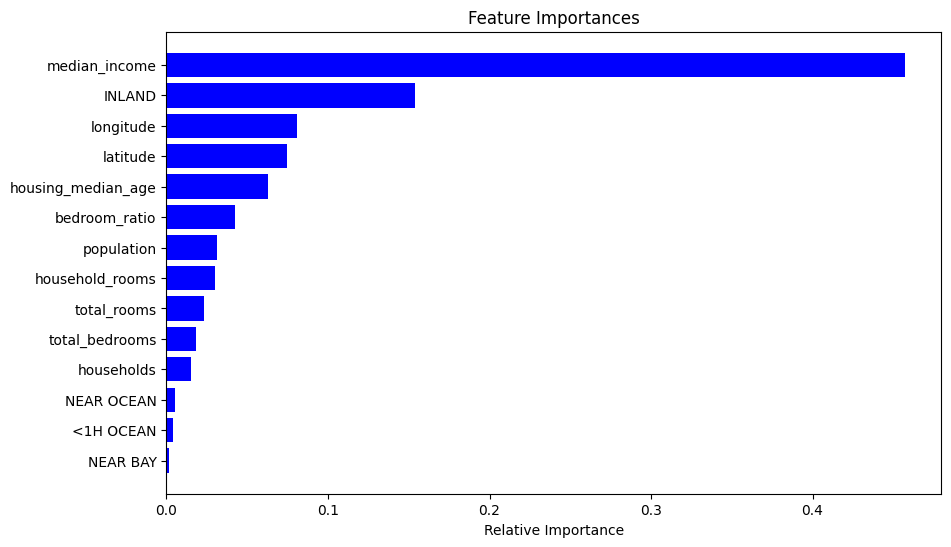

In [43]:
#visualizing feature importance

importances = best_forest.feature_importances_
features = X_train.columns
plt.figure(figsize=(10, 6))
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()